<a href="https://colab.research.google.com/github/angelnaibaho/FP_DataMining/blob/main/Tanpa_SMOTE_(80_20).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/drive/MyDrive/Data Mining/Youtube Stemming.csv')
df

,Type,textDisplay_stemming
0,Non-Toxic,"['bocah', 'cerdas', 'kumpul', 'brundang', 'rit..."
1,Non-Toxic,"['akhirnyaaa', 'abeee', 'tunggu', 'tungguu']"
2,Non-Toxic,"['lucuuu', 'bangett', 'bocilkuuu']"
3,Non-Toxic,"['bayi', 'meteor', 'akuuuuu']"
4,Non-Toxic,"['bully', 'donk', 'nama', 'anak', 'elaaah', 'k..."
...,...,...
1094,Non-Toxic,"['top', 'mantap', 'is', 'the', 'best']"
1095,Non-Toxic,['yuhuuuu']
1096,Non-Toxic,"['aa', 'moga']"
1097,Non-Toxic,['pertamaaa']


In [ ]:
# Pisahkan kolom fitur dan target
X = df['textDisplay_stemming']
y = df['Type']

# Split data menjadi training (80%) dan testing (20%)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Output shape untuk memastikan
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (879,)
X_test shape: (220,)
y_train shape: (879,)
y_test shape: (220,)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

tfidf = TfidfVectorizer()

# Transformasi teks menjadi vektor numerik
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [ ]:
# Melatih model Naive Bayes
mnb = MultinomialNB(alpha=0.1, fit_prior=True)
mnb.fit(X_train_tfidf, y_train)

# Prediksi dan evaluasi
y_pred_train = mnb.predict(X_train_tfidf)
y_pred_test = mnb.predict(X_test_tfidf)

# Evaluasi akurasi
acc_train = accuracy_score(y_train, y_pred_train)
acc_test = accuracy_score(y_test, y_pred_test)

# Mencetak hasil evaluasi
print(f'Akurasi Data Latih: {acc_train}')
print(f'Akurasi Data Uji: {acc_test}')

# Mencetak classification report untuk evaluasi yang lebih detail
print("\nClassification Report (Data Uji):")
print(classification_report(y_test, y_pred_test))

Akurasi Data Latih: 0.9863481228668942
Akurasi Data Uji: 0.8681818181818182

Classification Report (Data Uji):
              precision    recall  f1-score   support

   Non-Toxic       0.89      0.97      0.92       184
       Toxic       0.68      0.36      0.47        36

    accuracy                           0.87       220
   macro avg       0.78      0.66      0.70       220
weighted avg       0.85      0.87      0.85       220



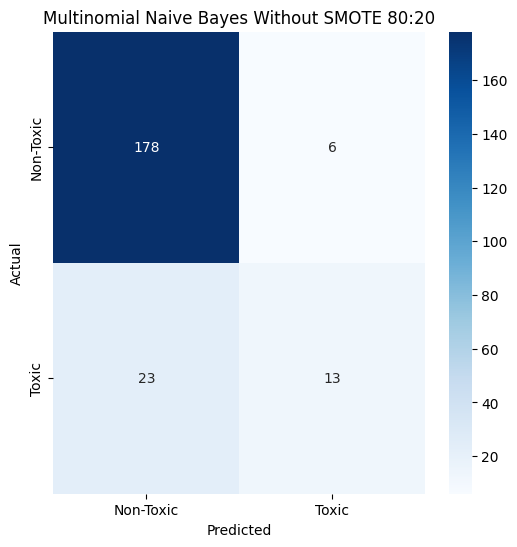

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix untuk model MultinomialNB
cm_mnb = confusion_matrix(y_test, y_pred_test)

# Visualisasi confusion matrix untuk MultinomialNB
plt.figure(figsize=(6, 6))
sns.heatmap(cm_mnb, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Toxic', 'Toxic'], yticklabels=['Non-Toxic', 'Toxic'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Multinomial Naive Bayes Without SMOTE 80:20')
plt.show()

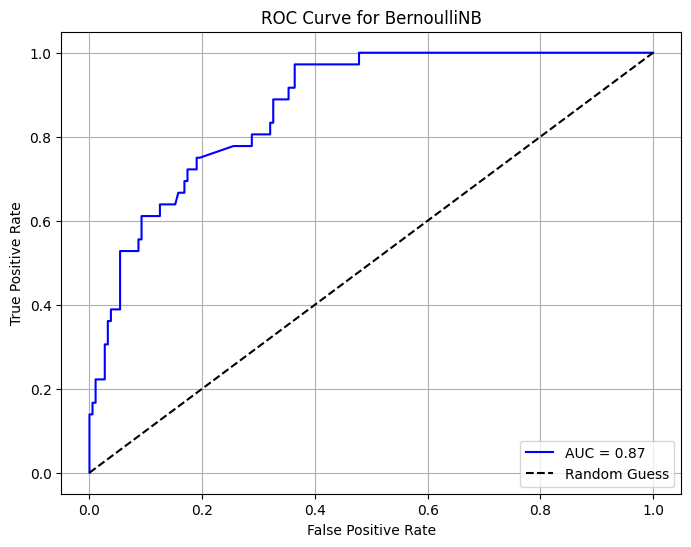

In [ ]:
# Import library tambahan
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer

# Mendapatkan probabilitas prediksi untuk data uji
y_proba_test = mnb.predict_proba(X_test_tfidf)[:, 1]  # Probabilitas kelas positif

# Konversi label menjadi numerik
lb = LabelBinarizer()
y_test_binary = lb.fit_transform(y_test).ravel()  # Ubah menjadi array 1D

# Hitung ROC curve dan AUC menggunakan y_test_binary
fpr, tpr, thresholds = roc_curve(y_test_binary, y_proba_test)
auc_score = roc_auc_score(y_test_binary, y_proba_test)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}', color='blue')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for BernoulliNB')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [ ]:
import pickle

# Menyimpan model ke file
with open('multinominalNB_model.pkl', 'wb') as model_file:
    pickle.dump(mnb, model_file)

# Menyimpan vectorizer jika diperlukan
with open('vectorizer.pkl', 'wb') as vectorizer_file:
    pickle.dump(tfidf, vectorizer_file)

In [ ]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, classification_report

# Melatih model Bernoulli Naive Bayes
bnb = BernoulliNB(alpha=0.1, fit_prior=True)
bnb.fit(X_train_tfidf, y_train)

# Prediksi dan evaluasi
y_pred_train = bnb.predict(X_train_tfidf)
y_pred_test = bnb.predict(X_test_tfidf)

# Evaluasi akurasi
acc_train = accuracy_score(y_train, y_pred_train)
acc_test = accuracy_score(y_test, y_pred_test)

# Mencetak hasil evaluasi
print(f'Akurasi Data Latih: {acc_train}')
print(f'Akurasi Data Uji: {acc_test}')

# Mencetak classification report untuk evaluasi yang lebih detail
print("\nClassification Report (Data Uji):")
print(classification_report(y_test, y_pred_test))

Akurasi Data Latih: 0.9522184300341296
Akurasi Data Uji: 0.8636363636363636

Classification Report (Data Uji):
              precision    recall  f1-score   support

   Non-Toxic       0.88      0.97      0.92       184
       Toxic       0.69      0.31      0.42        36

    accuracy                           0.86       220
   macro avg       0.78      0.64      0.67       220
weighted avg       0.85      0.86      0.84       220



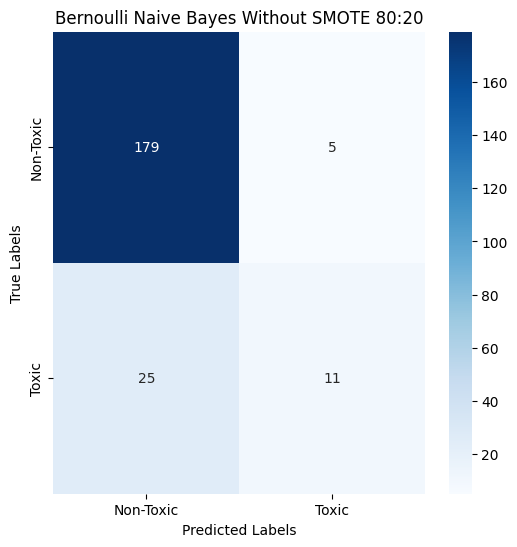

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix untuk model BernoulliNB
cm_bnb = confusion_matrix(y_test, y_pred_test)

# Visualisasi confusion matrix untuk BernoulliNB
plt.figure(figsize=(6, 6))
sns.heatmap(cm_bnb, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Toxic', 'Toxic'], yticklabels=['Non-Toxic', 'Toxic'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Bernoulli Naive Bayes Without SMOTE 80:20')
plt.show()